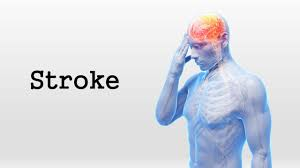

**A stroke occurs when the blood supply to part of your brain is interrupted or reduced, preventing brain tissue from getting oxygen and nutrients. Brain cells begin to die in minutes. A stroke is a medical emergency, and prompt treatment is crucial. Today we'll predict whether a person can have stroke**

# Please Upvote this kernel and if you find it helpful please keep it in your Favourite Section.







# OBJECTIVE
1. Exploratory Data Analysis
2. Stroke Prediction

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Importing necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
import sklearn.metrics as mt
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
%matplotlib inline

**Importing data**

In [ ]:
data=pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')

In [ ]:
data.head()

**Checking Null Values**

In [ ]:
data.isnull().sum()

In [ ]:
data['bmi']=data['bmi'].fillna(data['bmi'].mean())

In [ ]:
data.info()

**Checking the Target Distribution**

In [ ]:
fig,n = plt.subplots(figsize=(7,4))
g=sns.barplot(x=data['stroke'].value_counts().index,y=data['stroke'].value_counts())
g.set_xlabel('Stroke happened')
g.set_ylabel('Number of observations')
g.set_title('Data distribution')

**Checking some plots for the Distribution of the Numerical features**

In [ ]:
numerical=['age','avg_glucose_level','bmi']
for x in numerical:
    fig,n=plt.subplots(figsize=(10,5))
    g=sns.distplot(data[x])
    g.set_title(f'Distribution of {x}')
    

In [ ]:
sns.pairplot(data[numerical])

In [ ]:
sns.heatmap(data[numerical].corr(),annot=True)

**Checking some plots for the Categorical features where Stroke Occured**

In [ ]:
categorical=['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']
for x in categorical:
    cat=data[data['stroke']==1][x]
    fig,n=plt.subplots(figsize=(10,3))
    g=sns.barplot(x=cat.value_counts().index,y=cat.value_counts())
    g.set_title(f'Stroke distribution by {x}')
    g.set_ylabel('Number of observations')
    

**LabelEncoding for the Object type features**

In [ ]:
obtype=['gender','ever_married','work_type','Residence_type','smoking_status']
gen_encode=LabelEncoder()
mar_encode=LabelEncoder()
work_encode=LabelEncoder()
res_encode=LabelEncoder()
smo_encode=LabelEncoder()
data['gender']=gen_encode.fit_transform(data['gender'])
data['ever_married']=mar_encode.fit_transform(data['ever_married'])
data['work_type']=work_encode.fit_transform(data['work_type'])
data['Residence_type']=res_encode.fit_transform(data['Residence_type'])
data['smoking_status']=smo_encode.fit_transform(data['smoking_status'])

**Splitting dataset for Train and Test**

In [ ]:
train=data.sample(frac=0.7,random_state=1)
test=data.loc[~data.id.isin(train.index)]

**Splitting Training dataset into Training and Validation**

In [ ]:
X=train.iloc[:,1:-1]
y=train.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

**Applying Cross Validations**

In [ ]:
from sklearn.model_selection import cross_val_score
ran=RandomForestClassifier(n_estimators=100)
xgb=XGBClassifier()
score_ran=cross_val_score(ran,X,y,cv=10,scoring='f1').mean()    
score_xgb=cross_val_score(xgb,X,y,cv=10,scoring='f1').mean()


In [ ]:
score_ran

In [ ]:
score_xgb

*Now we can see that XGBoost is giving better results for F1 score*

**Fitting with XGBoostClassifier**

In [ ]:
xgb.fit(X_train,y_train)
pred=xgb.predict(test.iloc[:,1:-1])

**Using various metrics**

In [ ]:
print(mt.classification_report(test.iloc[:,-1],pred))

In [ ]:
print(mt.accuracy_score(test.iloc[:,-1],pred))

In [ ]:
print(mt.precision_score(test.iloc[:,-1],pred))

In [ ]:
print(mt.recall_score(test.iloc[:,-1],pred))

In [ ]:
mt.plot_roc_curve(xgb,test.iloc[:,1:-1],test.iloc[:,-1])

**Finally storing the predicted values of the test data to csv**

In [ ]:
test['predicted']=pred
final=test[['id','predicted']]

In [ ]:
final.to_csv('test.csv')